In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':14})
import cmocean.cm as cm
import os
import re

In [2]:
path = 'results_n_nodes/'

files = os.listdir(path)
files = [file for file in files if 'output_' in file]

def get_numbers(filename):
    return [int(n) for n in re.findall(r'\d+', filename)]

files = sorted(files, key=get_numbers)

runtimes = {}
for file in files:
    grid_len = file.split('_')[1]
    nproc = file.split('_')[2]
    ntimesteps = int(file.split('_')[3].split('.')[0])

    with open(path+file) as f:
        for line in f:
            if 'time for model run:' in line:
                runtime = float(line.split(':')[1].strip())

                if grid_len not in runtimes:
                    runtimes[grid_len] = []
                runtimes[grid_len].append(runtime / ntimesteps)
                break

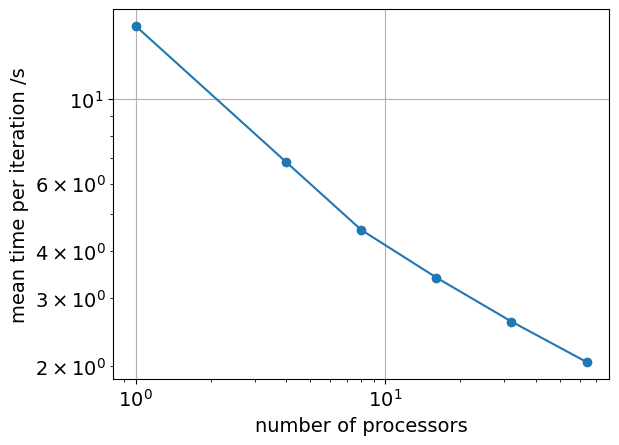

In [3]:
fig, ax = plt.subplots()
nprocs = [1, 4, 8, 16, 32, 64]

for i, key in enumerate(runtimes):
    ax.plot(nprocs, runtimes[f'{key}'], 'o', color=f'C{i}')
    ax.plot(nprocs, runtimes[f'{key}'], color=f'C{i}', label=f'grid length = {key}')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('number of processors')
ax.set_ylabel('mean time per iteration /s')
ax.grid(True)
#ax.legend(loc='center left', bbox_to_anchor=(1,0.5))